In [38]:
import gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
env = gym.make('FrozenLake-v1', render_mode = 'human')

In [40]:
env.reset()

(0, {'prob': 1})

In [41]:
env.render()

In [42]:
env.close()

In [43]:
env.observation_space

Discrete(16)

In [44]:
env.action_space

Discrete(4)

In [45]:
env.P[0][1]
#(probability, next state, reward, isTerminalState)

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

In [46]:
discountFactor = 0.9

In [47]:
valueFunctionVector = np.zeros(env.observation_space.n)

In [48]:
valueFunctionVector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
convergenceTolerance = 10**(-6)

In [50]:
convergenceTrack = []

In [51]:
number_Of_Iterations = 1000

In [52]:
for iteration in range(number_Of_Iterations):
    convergenceTrack.append(np.linalg.norm(valueFunctionVector, 2))
    valueFunctionVectorNextIteration = np.zeros(env.observation_space.n)
    for state in env.P:
        outerSum = 0
        for action in env.P[state]:
            innerSum = 0
            for probability, nextState, reward, isTerminalState in env.P[state][action]:
                innerSum += probability * (reward + discountFactor * valueFunctionVector[nextState])
            outerSum += 0.25*innerSum
        valueFunctionVectorNextIteration[state] = outerSum
    if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<convergenceTolerance):
        valueFunctionVector = valueFunctionVectorNextIteration
        print('Convergence Tolerance:', convergenceTolerance)
        break
    valueFunctionVector = valueFunctionVectorNextIteration

Convergence Tolerance: 1e-06


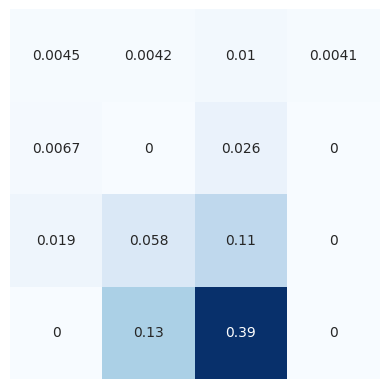

In [53]:
def grid_print(valueFunction, reshapeDim):
    ax = sns.heatmap(valueFunction.reshape(4,4), annot=True, square=True, cbar=False, cmap='Blues', xticklabels=False, yticklabels=False)
    plt.savefig('value_function.png', dpi=600)
    plt.show()
grid_print(valueFunctionVector, 4)

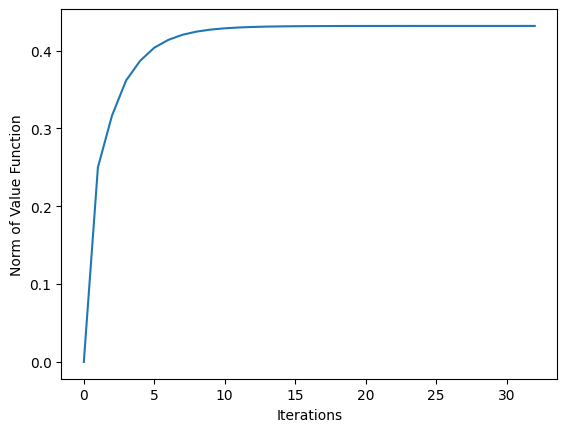

In [54]:
plt.plot(convergenceTrack)
plt.xlabel('Iterations')
plt.ylabel('Norm of Value Function')
plt.savefig('convergence.png', dpi=600)
plt.show()

In [55]:
env.close()